TODO: put this in a unittest

In [1]:
import jax
from jax import numpy as np
from jax import scipy as sp

import numpy as onp

from bnpgmm_runjingdev import gmm_stick_influence_lib as gmm_influence_lib

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
k_approx = 15

# draw means between -5 and 5
means = onp.random.rand(k_approx) * 20 - 10

# draw sd between -1 and 1
sds = onp.random.rand(k_approx) * 2 - 1

infos = 1 / sds**2

In [3]:
def test_influence(inf_fun): 
    worst_case_pert = gmm_influence_lib.WorstCasePerturbation(influence_fun = inf_fun, 
                                                          logit_v_lb= -20, 
                                                          logit_v_ub = 20, 
                                                          n_logit_v = 100000)
    
    # analytic expectation
    e_log_pert = worst_case_pert.get_e_log_linf_perturbation(means, infos)
    
    # sampled expectation
    n_samples = 100000

    _infos = infos[:, None]
    _means = means[:, None]
    normal_samples = onp.random.randn(len(means), n_samples) * 1 / np.sqrt(_infos) + _means

    log_pert_sampled = np.sign(inf_fun(normal_samples)).sum(0)
    
    mean = log_pert_sampled.mean()
    se = np.std(log_pert_sampled) / np.sqrt(n_samples)
    
    # print results
    print('analytic: ', e_log_pert)
    print('sampled (se): {:.05f}({:.05f})'.format(mean, se))
    print('zscore: {}'.format((e_log_pert - mean) / se))

# Infuence function 1

/home/rliu/anaconda3/envs/bnp_sensitivity_jax/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


analytic:  -1.3145657
sampled (se): -1.31362(0.00509)
zscore: -0.18596002459526062


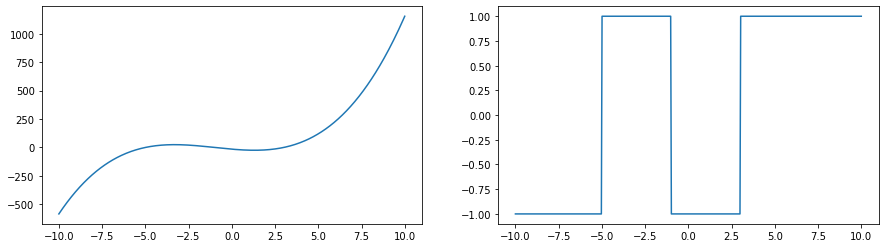

In [4]:
# odd function
# increasing as x --> infty

inf_fun = lambda x : (x - 3) * (x + 1) * (x + 5)

fig, ax = plt.subplots(1, 2, figsize = (15, 4)) 

x_grid = np.linspace(-10, 10, 500)
ax[0].plot(x_grid, inf_fun(x_grid))
ax[1].plot(x_grid, np.sign(inf_fun(x_grid)))

test_influence(inf_fun)

# Infuence function 2

analytic:  1.3145657
sampled (se): 1.32376(0.00505)
zscore: -1.8200794458389282


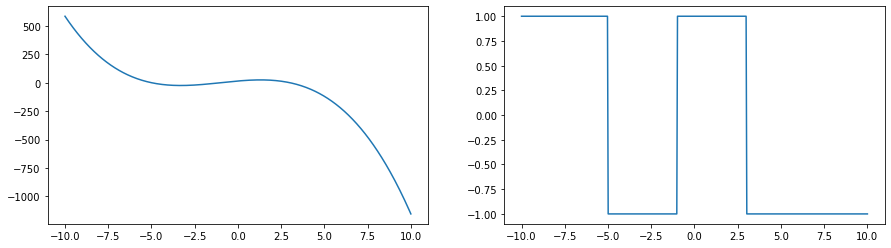

In [5]:
# odd function
# decreasing as x --> infty

inf_fun = lambda x : (x - 3) * (x + 1) * (x + 5) * (-1)

fig, ax = plt.subplots(1, 2, figsize = (15, 4)) 

x_grid = np.linspace(-10, 10, 500)
ax[0].plot(x_grid, inf_fun(x_grid))
ax[1].plot(x_grid, np.sign(inf_fun(x_grid)))

test_influence(inf_fun)

# Influence function 3

analytic:  3.7093143
sampled (se): 3.70802(0.00614)
zscore: 0.21095378696918488


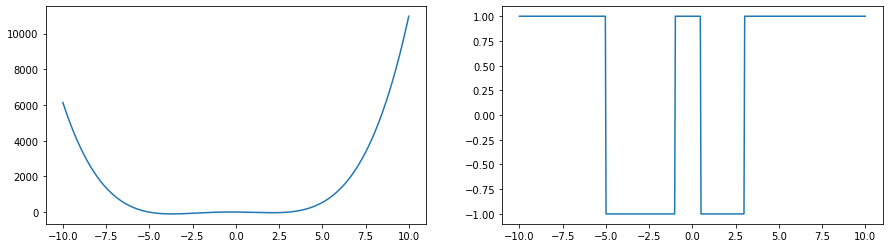

In [6]:
# even function
# increasing as x --> infty

inf_fun = lambda x : (x - 3) * (x - 0.5) * (x + 1) * (x + 5) 

fig, ax = plt.subplots(1, 2, figsize = (15, 4)) 

x_grid = np.linspace(-10, 10, 500)
ax[0].plot(x_grid, inf_fun(x_grid))
ax[1].plot(x_grid, np.sign(inf_fun(x_grid)))

test_influence(inf_fun)

# Influence function 4

analytic:  -3.7093143
sampled (se): -3.70576(0.00612)
zscore: -0.5806339383125305


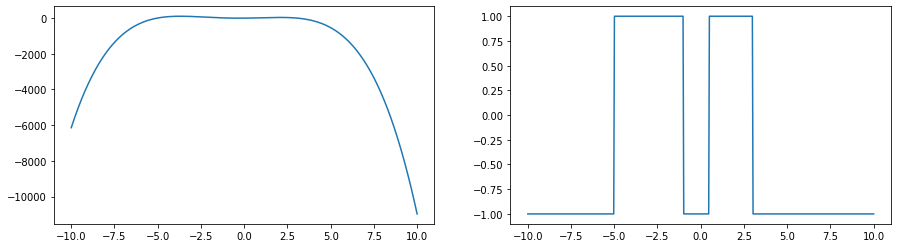

In [7]:
# even function
# decreasing as x --> infty

inf_fun = lambda x : (x - 3) * (x - 0.5) * (x + 1) * (x + 5) * (-1)

fig, ax = plt.subplots(1, 2, figsize = (15, 4)) 

x_grid = np.linspace(-10, 10, 500)
ax[0].plot(x_grid, inf_fun(x_grid))
ax[1].plot(x_grid, np.sign(inf_fun(x_grid)))

test_influence(inf_fun)